# matplotlib 中 plot 函数的精细控制

在作图时，可以通过参数或调用额外的方法来更精细地操控要绘制的图像，例如在一个轴域内，可以添加这些元素：

1. 标题
1. 轴标签
1. 轴刻度
1. 标注

在绘图中，也可能面临这样的需求：

1. 特别地标注出图中的某一个数据
2. 在多个数据集绘制到一个轴域的情况下，用不同的颜色区分，并在一旁标注每种颜色对应哪个数据集
3. 根据函数定义绘制出对应的函数图像

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
plt.rcParams["axes.unicode_minus"] = False
plt.rcParams["font.family"] = "SimHei"

## 轴域内的各元素

可以使用 `set_` 开头的一系列方法设置这些属性：

### title

`set_title`: 设置标题，传入一个字符串。

### label

`set_xlabel`, `set_ylabel`: 设置 x 或 y 轴标签，传入一个字符串，并且允许在 `$  $` 内使用 MathJax 能支持的 LaTeX 语法。

### ticks ticklabels

`set_xticks`, `set_yticks`: 设置 x 或 y 轴的刻度位置，传入一个可迭代对象，图像中的刻度线将出现在这些值所在的位置。

如果想要设置各个刻度上显示的标签，例如希望将 3.14 显示为 $\pi$，需要调用 `set_xticklabels` 或 `set_yticklabels` 方法，传入一个包含字符串的列表或其他可迭代对象。注意列表长度和顺序应当与刻度一致，，否则标签会被打到错误的位置。

`set_xticks` 和 `set_yticklabels` (y 轴同理）方法可传入一个 `minor=True` 的命名参数，这将修改图像的副刻度，也就是大刻度之间的小刻度。

`set_xticklabels` 方法可传入一个 `fontdict={...}` 命名参数，以设置字体。支持以下键值对：

| 键 | 类型 | 默认值 | 含义 |
|:-:|:-:|:-:|-|
| `fontsize` | int | `rcParams['axes.titlesize']` | 字体大小 |
| `fontweight` | int | `rcParams['axes.titleweight']` | 字重，粗细程度 |
| `verticalalignment` | str | `'baseline'` | 垂直方向上的对齐方式 |
| `horizontalalignment` | str | `'loc'` | 水平方向上的对其方式 |


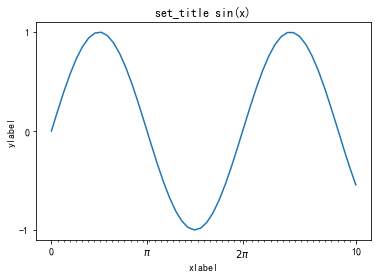

In [3]:
canvas1 = plt.figure(num=1, clear=True)
ax1 = canvas1.add_subplot()
x = np.linspace(0, 10)
y = np.sin(x)
ax1.plot(x, y)

# 使用 set_title 设置标题
ax1.set_title("set_title sin(x)");
# 使用 set_xlabel, set_ylabel 设置轴标签, y 标签方向是横过来的
ax1.set_xlabel("xlabel");
ax1.set_ylabel("ylabel");
# 使用 set_xticks set_yticks 更改刻度位置
ax1.set_xticks([0, 3.14, 6.28, 10]);
ax1.set_yticks([-1, 0, 1]);
## 使用 minor=True 参数以设置副刻度（大刻度内的小刻度） y 同理
ax1.set_xticks(np.arange(0, 10, 0.2), minor=True);
# 使用 set_xticklabels 设置刻度上显示的文字, y 同理; 同样支持设置副刻度
ax1.set_xticklabels(["0", "$\\pi$", "$2\\pi$", "10"]);

### 限制绘图范围

可以用 `set_xlim`, `set_ylim` 方法限制轴域绘制的范围，这两个方法都传入一个元组，确定此方向的上下限：

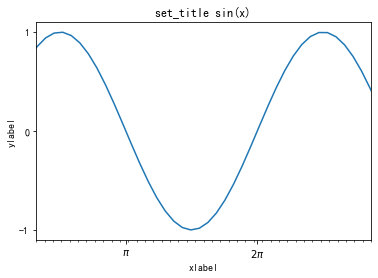

In [4]:
ax1.set_xlim(1, 9);
canvas1

## 标记图像内某一点

要标记图像上的某一点，可以调用 `axes` 的 `annotate` 方法，接受以下参数：

- `s`: 要显示的字符串
- `xy`: 数据所在的坐标
- `xytext`: 字符串所在的坐标
- `xycoords`: 标记数据时使用的坐标系
- `textcoords`: 标记字符串时使用的坐标系
- `arrowprops`: 对箭头的设置

前三个参数很好理解，两个坐标系的设置需要使用字符串作为传入的实参，`arrowprops` 则需要传入一个字典。

`xycoords` 默认采用数据集的零点 (`'data'`)，接受的值有：

| 值 | 效果 |
|:-:|-|
| `figure points` | 图像左下限为原点 |
| `figure pixels` | 图像左下限为原点，以像素数目计算 |
| `figure fraction` | 图像左下限为原点，按比例算， 0~1 内|
| `axes points` | 轴域左下限为原点（同 figure，也有 `pixels`, `fraction` 两个设置 |
| `data` | 数据集零点为原点 |
| `polar` | 将输入的坐标视作极坐标 $(\theta, r)$ |

`textcoords` 默认采用和 `xycoords` 相同的设置，接受的值有：

| 值 | 效果 |
|:-:|-|
| `offset points` | 以标注点为原点 |
| `offset pixels` | 以标注点为原点，但单位采用像素 |

`arrowprops` 可接受字典

| 键 | 类型 | 效果 |
|:-:|:-:|-|
| `width` | float | 箭头连线的粗细 |
| `headwidth` | float | 箭头的大小 |
| `headlength` | float | 箭头的长短 |
| `shrink` | float | 箭头从尾部到顶部的缩小率 |
| `?` | `matploblib.patches.FancyArrowPatch` 实例 | 箭头的形状 |

如果字典中包含 `arrowstyle` 键，那么以上设置无效，并且使用传入的预设样式：

- `-`, `->`, `-[`
- `|-|`, `-|>`, `<-`
- `<->`, `<|-`, `<|-|>`
- `fancy`, `simple`, `wedge`

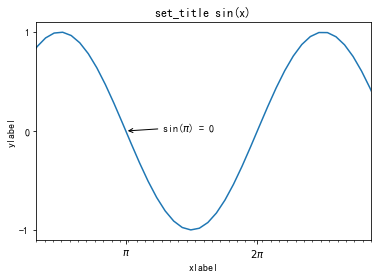

In [5]:
ax1.annotate("sin($\\pi$) = 0", xy=(3.14, 0), xytext=(4, 0),
            arrowprops={"arrowstyle": "->"})

canvas1

### 区分不同数据集

可以调用 `axes` 的 `legend` 方法来显示不同曲线的含义，
注意，如果没有在绘制时就设置好不同曲线的标签，那么，可以在调用 `legend` 方法时传入一个列表，里面是按绘制顺序排列的各曲线的标签。

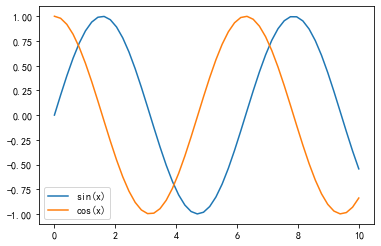

In [6]:
canvas2 = plt.figure(num=2, clear=True)
ax2 = canvas2.add_subplot()

x = np.linspace(0, 10)
y1 = np.sin(x)
y2 = np.cos(x)

ax2.plot(x, y1)
ax2.plot(x, y2)
# 注意传入参数的顺序，必须和绘制的顺序一致
ax2.legend(["sin(x)", "cos(x)"])

而在绘制曲线的同时就通过 `label="..."` 参数就设置了标签的话，就只需要调用 `legend` 而不需要传入其他参数了。

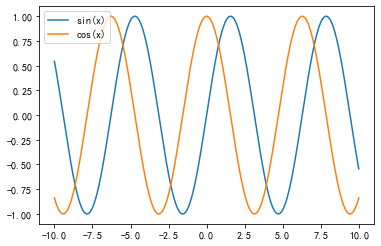

In [7]:
canvas3 = plt.figure(num=3, clear=True)
ax3 = canvas3.add_subplot()

x = np.linspace(-10, 10, num=1000)
y1 = np.sin(x)
y2 = np.cos(x)

# 在绘制时传入 label 参数设置标签
ax3.plot(x, y1, label="sin(x)");
# 在绘制后，对返回的 Line2D 对象设置标签
line, = ax3.plot(x, y2);
line.set_label("cos(x)");

ax3.legend();

### 绘制函数

在绘制函数时，我们通常需要进行以下步骤：

1. 构造 x 轴上的数组
2. 通过函数计算，得到对应的 y 数组
3. 通过 plot 函数将 x,y 点集绘制出来

我们可能希望像 Mathematica 一样，传入 函数定义、定义域就将函数图像绘制出来:

```mathematica
Plot[x^2, {0, 1}]
```

In [8]:
def Plot(function: "Callable", xrange: tuple):
    x = np.linspace(xrange[0], xrange[1], num=1000)
    y = function(x)
    plt.plot(x, y)

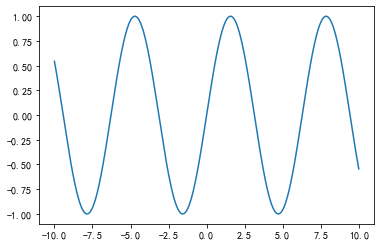

In [9]:
Plot(lambda x: np.sin(x), (-10, 10))

同时，我们一般希望坐标系布局为十字形，这将如此设置：

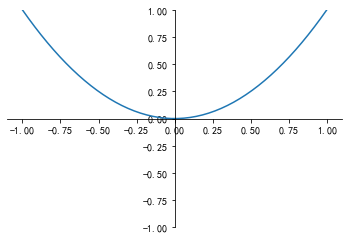

In [10]:
canvas4 = plt.figure(num=4, clear=True)
ax4 = canvas4.add_subplot()

x = np.linspace(-1, 1)
y = x**2

ax4.plot(x, y)

# 将下、左边框移动到中间作为坐标轴
ax4.spines["bottom"].set_position(("data", 0));
ax4.spines["left"].set_position(("data", 0));
# 隐去右、上边框
ax4.spines["top"].set_color("none");
ax4.spines["right"].set_color("none");

# 设置 y 轴上下限，以便原点位于轴域中心
ax4.set_ylim((-1, 1));